# <center>Тема 1. Первинний аналіз даних за допомогою Pandas</center>

**[Pandas](http://pandas.pydata.org)** — це бібліотека Python, що надає широкі можливості для аналізу даних. З її допомогою дуже зручно завантажувати, обробляти і аналізувати табличні дані за допомогою SQL-подібних запитів. З звязці з бібліотеками `Matplotlib` та `Seaborn` з'являэться можливысть зручного візуального аналізу табличних даних.

In [2]:
import numpy as np
import pandas as pd

Дані, якими працюють вчені з даних і аналітики, як правило зберігаються у вигляді таблиць — наприклад, у форматах `.csv`, `.tsv` чи `.xlsx`. Для того, щоб зчитати потрібні дані з такого файлу, добре підходять бібліотека Pandas.

Основними структурами даних в Pandas є класи `Series` и `DataFrame`. Перший з них є одномірним індексованим масивом даних деякого фіксованого типу. Другий - це двовимірна структура даних, тобто таблиця, кожний стовбець якої містить дані одного типу. Можна представити її як словник об'єктів типу `Series`. Структура `DataFrame` добре підходить для подання реальных даних: рядки відповідають ознаковим описам окремих об'єктів, а стовбці відповідають ознакам.

---------

## Демонстрація основних методів Pandas 


### Читання з файлу і первинний аналіз

Прочитаємо дані і подивимося на перші 5 рядків за допомогою метода `head`:

In [3]:
df = pd.read_csv('telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


В Jupyter-ноутбуках датафрейми `Pandas` виводятся у вигляді таких красивих таблиць, і `print(df.head())` виглядає гірше.

Доречі, за замовчуванням `Pandas` виводить всього 20 стовбців і 60 рядків, тому якщо ваш датафрейм більший, скористайтеся функцією `set_option`:

In [30]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

Tакож можемо вказати значення параметра `presicion` рівним 2, щоб відображати два знаки після коми (а не 6, як встановлено за замовчуванням.

In [31]:
pd.set_option('precision', 2)

**Поглянемо на розмір даних, назву ознак і їх типи**

In [32]:
print(df.shape)

(3333, 20)


Бачимо, що в таблиці 3333 рядки і 20 стовбців. Виводимо назви стовбців:

In [33]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


Щоб подивитися загальну інформацію про датафрейм і всіх ознаки, скористаємося методом **`info`**:

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


`bool`, `int64`, `float64` и `object` — це типи ознак. Бачимо, що 1 ознака — логічна (`bool`), 3 ознаки мають тип `object` і 16 ознак — числові.

**Змінити тип колонки** можна за допомогою метода `astype`. Застосуємо цей метод до ознаки `Churn` і переведемо його в `int64`:

In [35]:
df['Churn'] = df['Churn'].astype('int64')

Метод **`describe`** показує основні статистичні характеристики даних за кожною числовою ознакою (тип `int64` і `float64`): число непропущених значень, середнє, стандартне відхилення, діапазон, медіану, 0.25 і 0.75 квартилі.

In [36]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


Щоб подивитися статистику за нечисловими ознаками, потрібно явно вказати цікавляці нас типи в параметрі `include`. Можна також задати `include`='all', щоб вивести статистику за всіма доступними знаками
.

In [37]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


Для категоріальних (тип `object`) і булевих (тип `bool`) ознак  можна скористатися методом **`value_counts`**. Подивимося на розподіл нашої цільової змінної — `Churn`:

In [38]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

2850 користувача з 3333 — лояльні, значення змінної `Churn` у них — `0`.

Подивимося на розподіл користувачів за змінною `Area code`. Вкажемо значення параметра `normalize=True`, щоб подивитися не абсолютні частоти, а відносні.

In [39]:
df['Area code'].value_counts(normalize=True)

415    0.50
510    0.25
408    0.25
Name: Area code, dtype: float64

### Сортуання

`DataFrame` можна відсортувати за значенням якої-небудь з ознак. У нашому випадку, наприклад, за `Total day charge` (`ascending=False` для сортування за зменшенням):

In [40]:
df.sort_values(by='Total day charge', 
        ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


Сортувати можна і за групою стовбців:

In [41]:
df.sort_values(by=['Churn', 'Total day charge'],
        ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Індексація і отримання даних

`DataFrame` можна індексувати по-різному. У звязку з цим розглянемо різні способи індексації і отримання потрібних нам даних з датафрейму на прикладі простих питань.

Для отримання окремого стовбця можна використати конструкцію такого вигляду `DataFrame['Name']`. Скористаємося цим для відповіді на питання: **яка частка нелояльних користувачів у нашому датафреймі?**

In [42]:
df['Churn'].mean()

0.14491449144914492

14,5% — доволі поганий показник для компанії, з таким процентом відтоку можна і збанкрутувати.

Дуже зручною є логічна індексація `DataFrame` за одним стовбцем. Виглядає вона наступним чином: `df[P(df['Name'])]`, де `P` -  деяка логічна умова, що перевіряється для кожного елементу стовбця `Name`. Результатом такої індексації є `DataFrame`, що містить лише рядки, які задовольняють умову `P` за стовбцем `Name`. 

Скористаємося цим для відповіді на питання: **які середні значення числових ознак серед нелояльних користувачів?**

In [43]:
df[df['Churn'] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

Скомбінувавши попередні два види індексації, дамо відповідь на питання: **скільки в середньому протягом дня розмовляють по телефону нелояльні користувачі**?

In [44]:
df[df['Churn'] == 1]['Total day minutes'].mean()

206.91407867494814

**Яка максимальна тривалість міжнародних дзвінків серед лояльних користувачів (`Churn == 0`), що не користуються послугою міжнародного роумінгу (`'International plan' == 'No'`)?**

In [45]:
df[(df['Churn'] == 0) & (df['International plan'] == 'No')]['Total intl minutes'].max()

18.9

Датафрейми можна індексувати як за назвою стовбця чи рядка, так і за порядковим номером. Для індексації **за назвою** використовується метод **`loc`**, **за номером** — **`iloc`**.

В першому випадку ми говоримо  _«передай нам значення для id рядків від 0 до 5 і для стовбців від State до Area code»_, а в другому — _«передай нам значення перших п'яти рядків в перших трьох стовбцях»_. 

У випадку `iloc` зріз працює звичайно, однак у випадку `loc` враховується і початок, і кінець зрізу. Так, незручно, так, викликає путанину.

In [46]:
df.loc[0:5, 'State':'Area code']

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [47]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


Метод `ix` індексує і за назвою, і за номером, але він викликає путанину, і тому був оголошений застарілим (deprecated).

Якщо нам потрібна перший чи останній рядок датафрейму, можна скористатися конструкцією `df[:1]` або `df[-1:]`:

In [48]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Застосування функцій: `apply`, `map` та інших.

**Застосування функції до кожного стовбця:**

In [49]:
df.apply(np.max) 

State                          WY
Account length                243
Area code                     510
International plan            Yes
Voice mail plan               Yes
Number vmail messages          51
Total day minutes         3.5e+02
Total day calls               165
Total day charge               60
Total eve minutes         3.6e+02
Total eve calls               170
Total eve charge               31
Total night minutes         4e+02
Total night calls             175
Total night charge             18
Total intl minutes             20
Total intl calls               20
Total intl charge             5.4
Customer service calls          9
Churn                           1
dtype: object

Метод `apply` можна використовувати і для того, щоб застосувати функцію до кожного рядка. Для цього потрібно вказати `axis=1`.

**Застосування функції до кожної комірки стовбця**

Допустимо, з якоїсь причини нас цікавлять всі люди зі штатів, назви яких починаються на 'W'. В даному випадку це можна зробити по-різному, але найбільшу свободу дає звязка `apply`-`lambda` – застосування функції до всіх значень у стовбці.

In [8]:
df[df['State'].apply(lambda state: state[0] == 'W')].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,False
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,False
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,False
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,True


Метод `map` можна використовувати і для **заміни значень у колонці**, передавши йому як аргумент словник вигляду `{old_value: new_value}`:

In [9]:
d = {'No' : False, 'Yes' : True}
df['International plan'] = df['International plan'].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Аналогічну операцію можна провести за допомогою методу `replace`:

In [10]:
df = df.replace({'Voice mail plan': d})
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Групування даних

У загальному випадку групування даних в Pandas виглядає наступним чином:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. До датафрейму застосовують метод **`groupby`**, який розділяє дані за `grouping_columns` – ознаці чи набору ознак.
3. Індексуємо за потрібними нам стовбцями (`columns_to_show`). 
2. До отриманих груп застосовуються функція чи декілька функцій.

**Групування даних в залежності від значення ознаки `Churn` і виведення статистик по трьом стовбцям в кожній групі.**

In [11]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

Зробимо те ж саме, але дещо по іншому, передавши в `agg` список функцій:

In [12]:
columns_to_show = ['Total day minutes', 'Total eve minutes', 'Total night minutes']

df.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
False        175.175754  50.181655  0.0  315.6        199.043298  50.292175   
True         206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
False   0.0  361.8          200.133193  51.105032  23.2  395.0  
True   70.9  363.7          205.231677  47.132825  47.4  354.9

### Вільні таблиці

Наприклад, ми хочемо подивитися, як спостереження в нашій вибірці розподілені в контексті двох ознак — `Churn` і `Customer service calls`. Для цього ми можемо побудувати **таблицю спряженості**, скориставшись методом **`crosstab`**:

In [13]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,False,True
Churn,,
False,2664,186
True,346,137


In [14]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,False,True
Churn,,
False,0.602460,0.252625
True,0.120912,0.024002


Ми бачимо, що більшість користувачів — лояльні і користуються додатковими послугами (міжнародного роумінгу / голосової почти).

Просунуті користувачі `Excel` скоріш за все згадають про таку фічу, як **вільні таблиці** (`pivot tables`). В `Pandas` за вільні таблиці відповідає метод **`pivot_table`**, який приймає як параметри:

* `values` – список змінних, за якими потрібно розрахувати потрібні статистики,
* `index` – список змінних, за якими потрібно згрупувати дані,
* `aggfunc` — те, що нам, власне, потрібно підрахувати по групам — суму, середнє, максимум, мінімум чи ще щось.

Давайте подивимося середнє число денних, вечірніх і нічних звінків для різних `Area code`:

In [35]:
df.pivot_table(['Total day calls', 
                'Total eve calls', 
                'Total night calls'], ['Area code'], 
               aggfunc='mean').head(10)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


### Перетворення датафреймів

Як і багато інших речей, додавати стовбці в `DataFrame` можна декількома способами.

Наприклад, ми хочемо підрахувати загальну кількість звінків для всіх користувачів. Створимо об'єкт `total_calls` типу `Series` і вставимо його в датафрейм:

In [15]:
total_calls = df['Total day calls'] + df['Total eve calls'] + \
              df['Total night calls'] + df['Total intl calls']
df.insert(loc=len(df.columns), column='Total calls', value=total_calls) 
# loc - номер стовбця, після якого потрібно вставити даний Series
# ми вказали len(df.columns), щоб вставити його в самому кінці
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,359


Додати стовбець з наявних можна і простіше, не створюючи проміжних `Series`:

In [16]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + \
                     df['Total night charge'] + df['Total intl charge']

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,359,52.09


Щоб видалити стовбці чи рядки, скористайтеся методом `drop`, передаючи як аргумент потрібні індекси і значення параметра `axis` (`1`, якщо видаляєте стовбці, і нічого чи `0`, якщо видаляємо рядки):

In [38]:
# избавляемся от созданных только что столбцов
df = df.drop(['Total charge', 'Total calls'], axis=1) 

df.drop([1, 2]).head() # а вот так можно удалить строчки

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


--------



## Перші спроби прогнозування відтік


Подивимося, як відтік пов'язаний з ознакою *"Пыдключення міжнародного роумінгу"* (`International plan`). Виконаємо це за допомогою вільної таблиці `crosstab`, а також шляхом ілюстрації з `Seaborn` (як саме будувати такі картинки і аналізувати за їх допомогою графіки – матеріал наступної статті.)

In [18]:
# потрібно додатково встановити (команда в терміналі), якщо немає
# щоб картинки малювались в notebook 
# !conda install seaborn 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [19]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,False,True,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


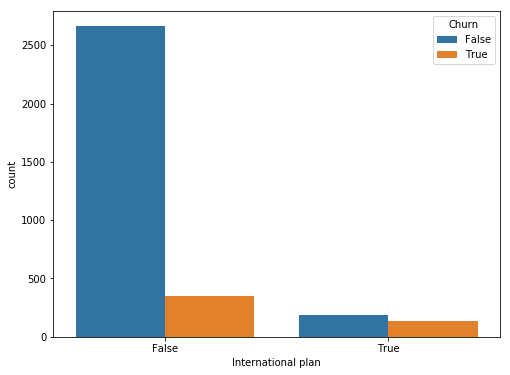

In [21]:
sns.countplot(x='International plan', hue='Churn', data=df);
plt.savefig('int_plan_and_churn.png', dpi=300);

Бачимо, що коли роумінг підключено, частка відтоку набагато вища – цікаве спостереження! можливо великі і погано контрольовані витрати в роумінгу дуже конфліктогенні і призводять до невдоволеності клієнтів телеком-оператора і, відповідно, до їх відтоку. 

Далі подивимося на ще одну важливу ознаку – *"Число звернень в сервісний центр"* (`Customer service calls`). Також побудуємо звсводную таблицу и картинку.

In [44]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


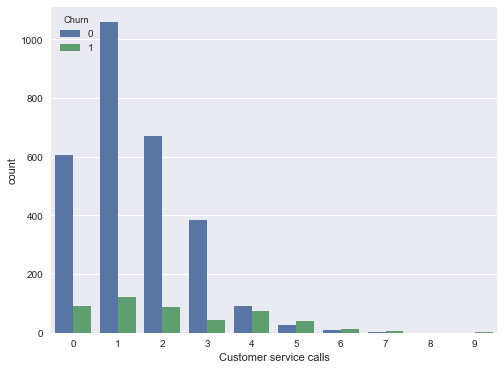

In [45]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.savefig('serv_calls__and_churn.png', dpi=300);

Можливо, за зведеною таблицею це не так добре видно (або нудно повзти поглядом по рядкам з цифрами), а ось картинка красномовно свідчить про те, що частка відтоку сильно зростає починаючи з 4 звінків в сервісний центр. 

Додамо тепер в наш DataFrame бінарну ознаку — результат порівняння `Customer service calls > 3`. І ще раз подивимося, як він пов'язаний з выдтоком. 

In [46]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


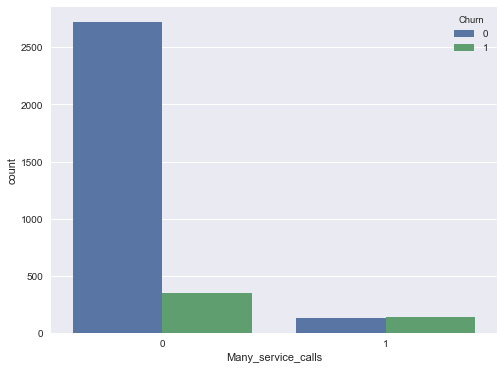

In [47]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);
plt.savefig('many_serv_calls__and_churn.png', dpi=300);

Об'єднаємо розглянуті вище умови і побудуємо зведену таблицю для цього об'єднання і віддтоку.

In [48]:
pd.crosstab(df['Many_service_calls'] & df['International plan'] , 
            df['Churn'])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Тобто, прогнозуючи відтік клієнта у випадку, коли число дзвінків в сервісний центр більше 3 і підключено роумінг (і прогнозуючи лояльність – в протилежному випадку), можна очікувати біля 85.8% правильних потраплянь (помиляємося лише  464 + 9 разів). Ці 85.8%, які ми отримали за допомогою дуже простих суджень – це непогана відправна точка (*baseline*) для подальших моделей машинного навчання, які ми будемо будувати. 

В цілому до появи машинного навчання процес аналізу даних виглядав приблизно так. Підсумуємо:
    
- Доля лояльних клієнтів у вибірці – 85.5%. Найбільш наївна модель, відповідь якої "Клієнт завжди лояльний" на подібних даних буде вгадувати приблизно в  85.5% випадків. Тобто є частка неправильних відповідей (*accuracy*) последующих моделей должны быть как минимум не меньше, а лучше, значительно выше этой цифры;
- С помощью простого прогноза , который условно можно выразить такой формулой: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можно ожидать долю угадываний 85.8%, что еще чуть выше 85.5%
- Эти два бейзлайна мы получили без всякого машинного обучения, и они служат отправной точной для наших последующих моделей. Если окажется, что мы громадными усилиями увеличиваем долю правильных ответов всего, скажем, на 0.5%, то возможно, мы что-то делаем не так, и достаточно ограничиться простой моделью из двух условий. 
- Перед обучением сложных моделей рекомендуется немного покрутить данные и проверить простые предположения. Более того, в бизнес-приложениях машинного обучения чаще всего начинают именно с простых решений, а потом экспериментируют с их усложнением. 